# **Introduction**

Real-world data rarely comes clean. Using Python and its libraries,we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called *data wrangling*.


The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.



WeRateDogs banner
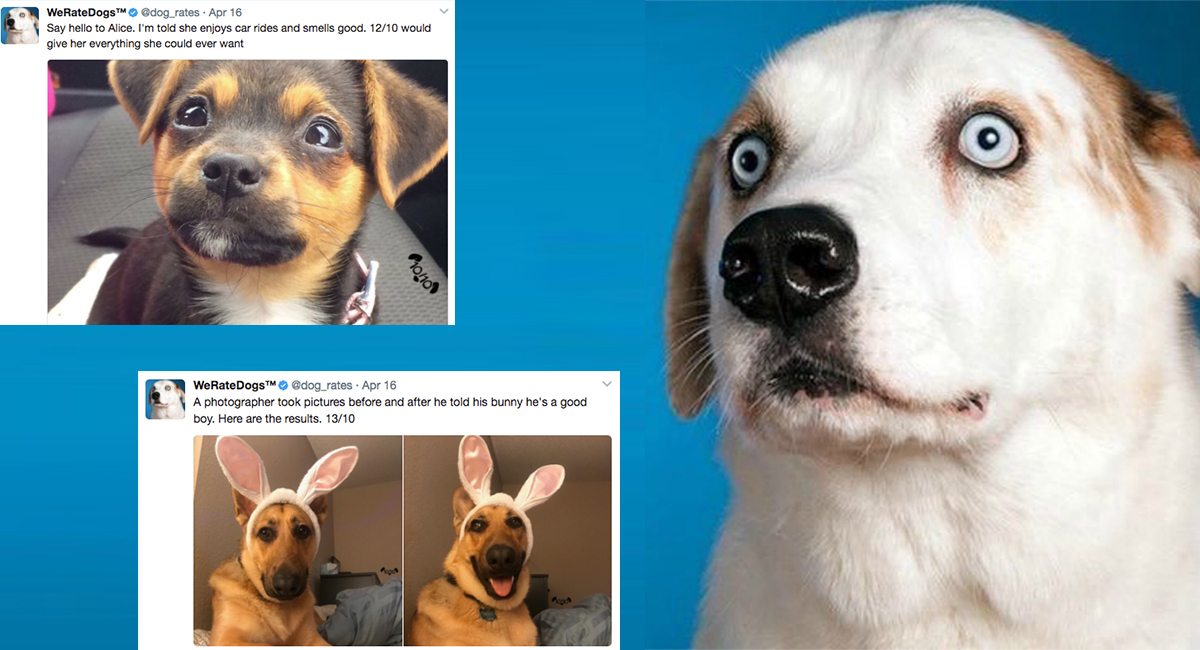


# **Step 1:Gather**

In this step,we will obtain data from three sources


*   The WeRateDogs Twitter archive which has been provided to us which contains basic tweet data for all 5000+ of their tweets
*   The tweet image predictions that contains image predictions that classify dog breeds
*   Additional data from the Twitter API that contains retweet count and favorite count 







In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [2]:
#Gathering data from the twitter archive
archive=pd.read_csv('/content/twitter-archive-enhanced.csv')
archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
#Gathering image predictions data from server
image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',allow_redirects=True)

open('image_predictions.tsv','wb').write(image_predictions.content)


335079

In [4]:
images=pd.read_csv('image_predictions.tsv',sep='\t')
images.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [5]:
#Gathering data from the twitter API
tweets=pd.read_json('/content/tweets.txt',lines=True)
tweets.head()

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorite_count  favorited  retweeted possibly_sensitive  \
0  ...           39467      False      False                0.0   
1  ...           33819      False      False                0.0   
2  ...           25461      False      False                0.0   
3  ...           42908      False      False                0.0   
4  ...           41048      False      False                0.0   

  possibly_sensitive_appealable  lang  retweeted_status quoted_status_id  \
0                           0.0    en               NaN              NaN   
1                           0.0    en               NaN              NaN   
2                           0.0    en               NaN              NaN   
3                           0.0    en               NaN              NaN   
4                           0.0    en               NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  
3                   NaN            NaN  
4                   NaN            NaN  

[5 rows x 31 columns]

# **Step 2:Assess Data**

When assessing, you're inspecting your data set for two things:

* Data quality issues: 
   *  **Completeness**: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?

   * **Validity**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
   
  * **Accuracy**: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. 

  * **Consistency**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a 
standard format, in columns that represent the same data across tables and/or within tables is desired.


* Lack of tidiness: Data that has specific structural issues that slow you down when cleaning and analyzing, visualizing, or modeling your data later.
 * Each variable forms a column
 * Each variable forms a row
 * Each type of observational unit forms a table

We will perform this using Visual & Programmatic methods



### ***Visual Assessment***

In [6]:
#Archive data
archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [7]:
#Image predictions data
images

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [8]:
#Tweets data
tweets

created_at                  id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2349 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2350 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2351 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2352 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2353 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     This is Phineas. He's a mystical boy. Only eve...      False   
1     This is Tilly. She's just checking pup on you....      False   
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
...                                                 ...        ...   
2349  Here we have a 1949 1st generation vulpix. Enj...      False   
2350  This is a purebred Piers Morgan. Loves to Netf...      False   
2351  Here is a very happy pup. Big fan of well-main...      False   
2352  This is a western brown Mitsubishi terrier. Up...      False   
2353  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
0               [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
...                 ...                                                ...   
2349           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2350           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2351           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2352           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2353           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 892420639486877696, 'id_str'...   
1     {'media': [{'id': 892177413194625024, 'id_str'...   
2     {'media': [{'id': 891815175371796480, 'id_str'...   
3     {'media': [{'id': 891689552724799489, 'id_str'...   
4     {'media': [{'id': 891327551943041024, 'id_str'...   
...                                                 ...   
2349  {'media': [{'id': 666049244999131136, 'id_str'...   
2350  {'media': [{'id': 666044217047650304, 'id_str'...   
2351  {'media': [{'id': 666033409081393153, 'id_str'...   
2352  {'media': [{'id': 666029276303482880, 'id_str'...   
2353  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r..

### ***Programmatic Assessment***

In [9]:
#Checking for missing data
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

***Completeness***

We have missing data in the columns ; 
'**in_reply_to_status_id**', '**in_reply_to_user_id**', '**timestamp**',
       '**source**', '**text**', '**retweeted_status_id**', '**retweeted_status_user_id**',
       '**retweeted_status_timestamp**' & '**expanded_urls**' 
The missing data in the rest of the columns save for expanded_urls are insignificant as they are optional and belong to retweets ,which are further going to be deleted later on.

Let us look into the missing data in the expanded_urls column

In [10]:
archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [11]:
archive.expanded_urls.duplicated().sum()

137

We have 137 duplicated urls which could be accounted for by presence of retweets,let us check if we have duplicates in the original tweets

In [12]:
duplicated_urls=archive[archive.expanded_urls.duplicated()]
duplicated_urls.to_csv('duplicated_urls.csv')

In [13]:
archive['tweet_id'].duplicated().sum()

0


From assessment gathered,we have one tweet that is duplicated and is not a retweet.Which will need to be cleaned.






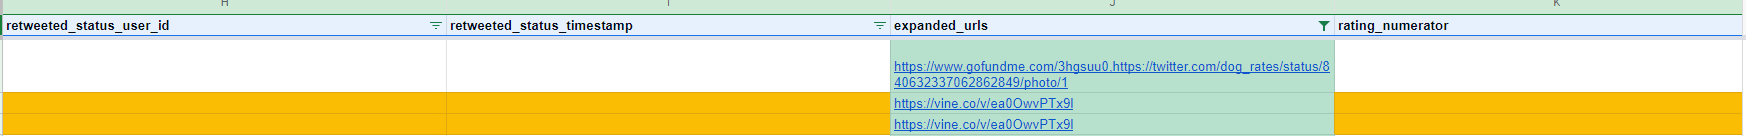

In [14]:
images['jpg_url'].duplicated().sum()

66

We have duplicated images in the jpg_url column 


In [15]:
#Checking for missing data 
images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
#Checking for duplicates
images['tweet_id'].duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [17]:
#Checking for missing data 
tweets.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [18]:
#Checking for duplicates 
tweets['id'].duplicated().value_counts()

False    2354
Name: id, dtype: int64

We have missing data in the tweets dataset from 16 columns

***Validity***

In [19]:
pd.set_option('display.max_rows', None)


In [20]:
archive['name'].value_counts().sort_values(ascending=False)


None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Toby                7
an                  7
Bailey              7
Buddy               7
Daisy               7
Dave                6
Milo                6
Jax                 6
Scout               6
Jack                6
Koda                6
Bella               6
Rusty               6
Stanley             6
Oscar               6
Leo                 6
Bentley             5
Larry               5
George              5
Finn                5
Oakley              5
very                5
Phil                5
Sunny               5
Chester             5
Gus                 5
Sammy               5
Louis               5
Alfie               5
one                 4
Sophie              4
Sampson             4
Boomer    

Some of the names like ***'a','an','the','o'*** are not valid names and there's presence of missing names as well


***Consistency***

In [21]:
images.sample(5)

tweet_id                                          jpg_url  \
1091  719367763014393856  https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg   
1108  723688335806480385  https://pbs.twimg.com/media/CgsOszGW0AAruKp.jpg   
1207  742161199639494656  https://pbs.twimg.com/media/CkyvqnNWYAQxQY1.jpg   
1304  753294487569522689  https://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg   
593   679475951516934144  https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg   

      img_num           p1   p1_conf  p1_dog                           p2  \
1091        1        swing  0.171486   False  soft-coated_wheaten_terrier   
1108        2        teddy  0.263256   False                         chow   
1207        1      balloon  0.990736   False                 punching_bag   
1304        1         chow  0.194773    True                      monitor   
593         1  Maltese_dog  0.145742    True                   toy_poodle   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
1091  0.050971    True              Tibetan_terrier  0.047759    True  
1108  0.089010    True                Irish_terrier  0.065306    True  
1207  0.004754   False                    parachute  0.000436   False  
1304  0.102305   False               Siberian_husky  0.086855    True  
593   0.139407    True  West_Highland_white_terrier  0.108821    True

The naming of the columns is not easily interpreted i.e p1 could be renamed to name to bring a more granular meaning towards the name.




In [22]:
images.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

tweet_id should be converted to a string object

In [23]:
tweets.dtypes

created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                                 f

tweet_id should be converted to string obect,timestamp to datetime object

In [24]:
archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [25]:
archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [26]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [27]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [28]:
images['p1'].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
teddy                              18
beagle                             18
Lakeland_terrier                   17
Rottweiler  

In [29]:
images['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
Samoyed                            20
toy_terrier                        20
malinois                           20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [30]:
images['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

At first glance the naming of the breeds is not consistent some are capitalized and have underscores in names.This shoud be rectified


Data Quality Issues


1. We have inconsistent naming format in the images dataset with the some dog names capitalised and the rest are in lowercase

2. We have duplicated expanded urls originating from retweets and one from an original tweet

3. We have missing data in the archive dataset with only 'Expanded URLS' and 'names' column worth deep diving into as the rest of the columns with missing data are insignificant.However we will not drop the missing names columns as the text column has some of the dog names and can be extracted for this.

4. We have inconsistent naming format in the images dataset with the some dog names capitalised and the rest are in lowercase

5. We have invalid dog names such as 'a' ,'the','o' and 'an' in the archive dataset

6. Inconsistent data types of datetime objects and tweet_ids should be converted to string objects

7. Prediction columns have inconsistent naming formats

8. Duplicated jpg_urls which should be removed

9. Convert NaN to None





Tidiness/Structural Issues

1. The three datasets should be combined into one

2. The columns doggo, floofer, pupper, puppo can be melted to form a single column to indicate the dog_stage

3. The text column in the archive contains pronouns which can be extracted to get the dog's gender

4. We can extract the dog breed from the prediction columns and melt into one

5. Remove unnecessary columns






# **Step 3:Cleaning Data**
In this step we are are going to 

*   Define
*   Code
*   Test

But first lets make a copy of our original datasets




In [31]:
archive_clean=archive.copy()
tweets_clean=tweets.copy()
images_clean=images.copy()

**Define**
1. Merge the datasets into one 
  

**Code**

In [32]:
#Merging the datasets
tweets_clean['tweet_id']=tweets_clean['id']
master_df=pd.merge(pd.merge(archive_clean,tweets_clean,on='tweet_id'),images_clean,on='tweet_id')

**Test**

In [33]:
master_df.head()

tweet_id  in_reply_to_status_id_x  in_reply_to_user_id_x  \
0  892420643555336193                      NaN                    NaN   
1  892177421306343426                      NaN                    NaN   
2  891815181378084864                      NaN                    NaN   
3  891689557279858688                      NaN                    NaN   
4  891327558926688256                      NaN                    NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                            source_x  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...  img_num  \
0  https://twitter.com/dog_rates/status/892420643...  ...        1   
1  https://twitter.com/dog_rates/status/892177421...  ...        1   
2  https://twitter.com/dog_rates/status/891815181...  ...        1   
3  https://twitter.com/dog_rates/status/891689557...  ...        1   
4  https://twitter.com/dog_rates/status/891327558...  ...        2   

            p1   p1_conf p1_dog                  p2   p2_conf p2_dog  \
0       orange  0.097049  False               bagel  0.085851  False   
1    Chihuahua  0.323581   True            Pekinese  0.090647   True   
2    Chihuahua  0.716012   True            malamute  0.078253   True   
3  paper_towel  0.170278  False  Labrador_retriever  0.168086   True   
4       basset  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf  p3_dog  
0                       banana  0.076110   False  
1                     papillon  0.068957    True  
2                       kelpie  0.031379    True  
3                      spatula  0.040836   False  
4  German_short-haired_pointer  0.175219    True  

[5 rows x 59 columns]

In [34]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        

In [35]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        

**Define**
  2. Removing duplicated data from the expanded_urls column

In [36]:
#Displaying the rows with duplicated urls
#Lets make a copy of the new dataframe
master_df_clean=master_df.copy()
master_df_clean['expanded_urls'].duplicated().sum()

0

*Merging the datasets removed the duplicated expanded_urls*

**Define**
  3. Removing missing data from the expanded_urls column

**Code**

In [37]:
#Displaying rows with missing expanded_urls
master_df_clean[master_df_clean['expanded_urls'].isna()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id_x, in_reply_to_user_id_x, timestamp, source_x, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, created_at, id, id_str, full_text, truncated, display_text_range, entities, extended_entities, source_y, in_reply_to_status_id_y, in_reply_to_status_id_str, in_reply_to_user_id_y, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, is_quote_status, retweet_count, favorite_count, favorited, retweeted, possibly_sensitive, possibly_sensitive_appealable, lang, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 59 columns]

*Merging the datasets removed the missing expanded_urls*

**Define**
 4. Change the dognames to a consistent format i.e to capitalize all names 


**Code**

In [38]:
# Display dog names
master_df_clean['name'].value_counts()

None              577
a                  55
Charlie            11
Penny              10
Oliver             10
Tucker             10
Cooper             10
Lucy               10
Bo                  8
Lola                8
Winston             8
Sadie               8
an                  7
Daisy               7
Toby                7
the                 7
Dave                6
Milo                6
Bella               6
Jax                 6
Scout               6
Rusty               6
Stanley             6
Bailey              6
Koda                6
Leo                 5
Oscar               5
Chester             5
Alfie               5
Louis               5
Buddy               5
Larry               5
Ruby                4
Walter              4
Maggie              4
Jerry               4
Oakley              4
Chip                4
Jack                4
very                4
Brody               4
just                4
Winnie              4
George              4
Bentley             4
Clark     

In [39]:
#Capitalize names
master_df_clean['name']=master_df_clean.name.str.capitalize()

**Test**

In [40]:
#Check if names are capitalized
master_df_clean['name'].value_counts()

None              577
A                  55
Charlie            11
Penny              10
Oliver             10
Tucker             10
Cooper             10
Lucy               10
Bo                  8
Lola                8
Winston             8
Sadie               8
An                  7
Daisy               7
Toby                7
The                 7
Dave                6
Milo                6
Bella               6
Jax                 6
Scout               6
Rusty               6
Stanley             6
Bailey              6
Koda                6
Leo                 5
Oscar               5
Chester             5
Alfie               5
Louis               5
Buddy               5
Larry               5
Ruby                4
Walter              4
Maggie              4
Jerry               4
Oakley              4
Chip                4
Jack                4
Very                4
Brody               4
Just                4
Winnie              4
George              4
Bentley             4
Clark     

**Define**
5.  Remove invalid dog names

**Code**

In [41]:
master_df_clean.loc[master_df_clean['name'].isin(['A','An','The','O'])]

tweet_id  in_reply_to_status_id_x  in_reply_to_user_id_x  \
50    881536004380872706                      NaN                    NaN   
524   792913359805018113                      NaN                    NaN   
610   778396591732486144                      NaN                    NaN   
624   776201521193218049                      NaN                    NaN   
647   772581559778025472                      NaN                    NaN   
822   747885874273214464                      NaN                    NaN   
824   747816857231626240                      NaN                    NaN   
833   746872823977771008                      NaN                    NaN   
838   746369468511756288                      NaN                    NaN   
859   743222593470234624                      NaN                    NaN   
995   717537687239008257                      NaN                    NaN   
1005  715733265223708672                      NaN                    NaN   
1122  704859558691414016                      NaN                    NaN   
1131  704054845121142784                      NaN                    NaN   
1141  703079050210877440                      NaN                    NaN   
1142  703041949650034688                      NaN                    NaN   
1147  702539513671897089                      NaN                    NaN   
1159  700864154249383937                      NaN                    NaN   
1262  692187005137076224                      NaN                    NaN   
1286  690360449368465409                      NaN                    NaN   
1352  685943807276412928                      NaN                    NaN   
1475  679530280114372609                      NaN                    NaN   
1518  677644091929329666                      NaN                    NaN   
1529  677269281705472000                      NaN                    NaN   
1546  676613908052996102                      NaN                    NaN   
1580  675706639471788032                      NaN                    NaN   
1581  675534494439489536                      NaN                    NaN   
1604  675109292475830276                      NaN                    NaN   
1605  675047298674663426                      NaN                    NaN   
1646  674082852460433408                      NaN                    NaN   
1663  673715861853720576                      NaN                    NaN   
1677  673636718965334016                      NaN                    NaN   
1716  672604026190569472                      NaN                    NaN   
1756  671743150407421952                      NaN                    NaN   
1759  671561002136281088                      NaN                    NaN   
1787  671147085991960577                      NaN                    NaN   
1837  670427002554466305                      NaN                    NaN   
1846  670361874861563904                      NaN                    NaN   
1849  670303360680108032                      NaN                    NaN   
1867  669923323644657664                      NaN                    NaN   
1873  669661792646373376                      NaN                    NaN   
1881  669564461267722241                      NaN                    NaN   
1910  668955713004314625                      NaN                    NaN   
1917  668815180734689280                      NaN                    NaN   
1923  668636665813057536                      NaN                    NaN   
1930  668614819948453888                      NaN                    NaN   
1936  668507509523615744                      NaN                    NaN   
1940  668466899341221888                      NaN                    NaN   
1953  668171859951755264                      NaN                    NaN   
1967  667861340749471744                      NaN                    NaN   
1973  667773195014021121                      NaN                    NaN   
1982  667538891197542400                      NaN               

In [42]:
#Replacing invalid names with none
master_df_clean=master_df_clean.replace({'name':{'A':'None','An':'None','The':'None','O':'None'}})


**Test**

In [43]:
master_df_clean.loc[master_df_clean['name'].isin(['A','An','The','O'])]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id_x, in_reply_to_user_id_x, timestamp, source_x, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, created_at, id, id_str, full_text, truncated, display_text_range, entities, extended_entities, source_y, in_reply_to_status_id_y, in_reply_to_status_id_str, in_reply_to_user_id_y, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, is_quote_status, retweet_count, favorite_count, favorited, retweeted, possibly_sensitive, possibly_sensitive_appealable, lang, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 59 columns]

**Define**
6. Extract dog gender from text column

**Code**

In [44]:
# Looping for pronouns of male or female;

male_pronouns = ['He', 'he','HE','HIM', 'him','Him','HIS', 'his','His',"HE'S" ,"he's","He's",'HIMSELF', 'himself','Himself','BOY','boy','Boy']
female_pronouns = ['She', 'she', 'SHE','HER','HERS','her','Her','hers','Hers','HERSELF', 'herself','Herself' ,"she's","She's","SHE'S",'SHE','GIRL','Girl','girl']

gender = []

for t in master_df_clean['text']:
    if any(map(lambda v:v in male_pronouns, t.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in female_pronouns, t.split())):
        gender.append('female')
    # If neither male nor female then none
    else:
        gender.append('None')

#add a new column for dog gender
master_df_clean['gender'] = gender


**Test**

In [45]:
#Check if gender column is populated correctly
master_df_clean['gender'].value_counts()

male      1046
None       675
female     352
Name: gender, dtype: int64

In [46]:
master_df_clean[master_df_clean['gender']=='None']

tweet_id  in_reply_to_status_id_x  in_reply_to_user_id_x  \
5     891087950875897856                      NaN                    NaN   
12    889665388333682689                      NaN                    NaN   
21    887517139158093824                      NaN                    NaN   
23    887343217045368832                      NaN                    NaN   
24    887101392804085760                      NaN                    NaN   
28    886366144734445568                      NaN                    NaN   
33    885167619883638784                      NaN                    NaN   
37    884441805382717440                      NaN                    NaN   
42    883117836046086144                      NaN                    NaN   
50    881536004380872706                      NaN                    NaN   
53    880872448815771648                      NaN                    NaN   
56    880095782870896641                      NaN                    NaN   
75    875144289856114688                      NaN                    NaN   
76    875021211251597312                      NaN                    NaN   
79    874057562936811520                      NaN                    NaN   
82    873580283840344065                      NaN                    NaN   
85    872820683541237760                      NaN                    NaN   
87    872486979161796608                      NaN                    NaN   
94    870804317367881728                      NaN                    NaN   
104   868622495443632128                      NaN                    NaN   
106   867900495410671616                      NaN                    NaN   
109   867072653475098625                      NaN                    NaN   
110   867051520902168576                      NaN                    NaN   
117   864873206498414592                      NaN                    NaN   
128   862096992088072192                      NaN                    NaN   
131   861288531465048066                      NaN                    NaN   
133   860924035999428608                      NaN                    NaN   
137   860184849394610176                      NaN                    NaN   
141   859196978902773760                      NaN                    NaN   
142   859074603037188101                      NaN                    NaN   
143   858843525470990336                      NaN                    NaN   
148   857393404942143489                      NaN                    NaN   
149   857263160327368704                      NaN                    NaN   
153   856282028240666624                      NaN                    NaN   
155   855459453768019968                      NaN                    NaN   
160   854010172552949760                      NaN                    NaN   
171   851861385021730816                      NaN                    NaN   
172   851591660324737024                      NaN                    NaN   
179   849776966551130114                      NaN                    NaN   
181   849336543269576704                      NaN                    NaN   
183   848690551926992896                      NaN                    NaN   
186   847971574464610304                      NaN                    NaN   
192   847116187444137987                      NaN                    NaN   
196   846042936437604353                      NaN                    NaN   
197   845812042753855489                      NaN                    NaN   
198   845677943972139009                      NaN                    NaN   
201   844979544864018432             7.590995e+17           4.196984e+09   
206   843856843873095681                      NaN                    NaN   
217   841439858740625411                      NaN                    NaN   
221   840632337062862849                      NaN                    NaN   
226   839290600511926273                      NaN                    NaN   
229   838916489579200512                      NaN               

**Define**
  7. Correct incorrect dtypes


In [47]:
master_df_clean.dtypes

tweet_id                                       int64
in_reply_to_status_id_x                      float64
in_reply_to_user_id_x                        float64
timestamp                                     object
source_x                                      object
text                                          object
retweeted_status_id                          float64
retweeted_status_user_id                     float64
retweeted_status_timestamp                    object
expanded_urls                                 object
rating_numerator                               int64
rating_denominator                             int64
name                                          object
doggo                                         object
floofer                                       object
pupper                                        object
puppo                                         object
created_at                       datetime64[ns, UTC]
id                                            

**Code**

In [48]:
from datetime import datetime
#Convert tweet_id,id,id_str to string and timestamp to datetime object
master_df_clean['tweet_id']=master_df_clean['tweet_id'].astype(str,errors='ignore')
master_df_clean['id']=master_df_clean['id'].astype(str,errors='ignore')
master_df_clean['id_str']=master_df_clean['id_str'].astype(str,errors='ignore')
master_df_clean['timestamp']=pd.to_datetime(master_df_clean['timestamp'],errors='ignore')



**Test**

In [49]:
master_df_clean.dtypes

tweet_id                                      object
in_reply_to_status_id_x                      float64
in_reply_to_user_id_x                        float64
timestamp                        datetime64[ns, UTC]
source_x                                      object
text                                          object
retweeted_status_id                          float64
retweeted_status_user_id                     float64
retweeted_status_timestamp                    object
expanded_urls                                 object
rating_numerator                               int64
rating_denominator                             int64
name                                          object
doggo                                         object
floofer                                       object
pupper                                        object
puppo                                         object
created_at                       datetime64[ns, UTC]
id                                            

**Define**:
8. Extract doggo,floofer,pupper,puppo from text column into one

**Code**

In [50]:
master_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].sample(10)

doggo floofer  pupper puppo
313    None    None    None  None
1427   None    None    None  None
1548   None    None  pupper  None
539    None    None    None  None
1190   None    None    None  None
305    None    None    None  None
1862   None    None    None  None
714    None    None    None  None
1162   None    None    None  None
340   doggo    None    None  None

In [51]:
# Extract the dog stage names from the the 4 individual columns and combine into one 'stage' column
# https://stackoverflow.com/questions/44061607/pandas-lambda-function-with-nan-support

stages= ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    master_df_clean[stage] = archive_clean[stage].apply(lambda x: np.NaN if x == 'None' else x)
    
master_df_clean['life_stage'] = master_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
master_df_clean['life_stage'] = master_df_clean['life_stage'].apply(lambda x: x.replace('nan', ''))
master_df_clean['life_stage'] = master_df_clean['life_stage'].apply(lambda x: np.NaN if x == '' else x)

master_df_clean['life_stage'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

In [52]:
master_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'created_at', 'id', 'id_str',
       'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'source_y', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog'

In [53]:
#Drop 'doggo', 'floofer', 'pupper', 'puppo' columns
master_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

**Test**

In [54]:
#Check if the 'doggo', 'floofer', 'pupper', 'puppo' columns have been dropped
master_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source_y',
       'in_reply_to_status_id_y', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_y', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'gender', 

**Define**
9. Clean the prediction columns names and combine into one

**Code**

In [55]:

master_df_clean[['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog']].sample(10)


img_num                           p1   p1_conf  p1_dog  \
1819        1                  wood_rabbit  0.368562   False   
845         2                     ice_bear  0.807762   False   
1255        1  German_short-haired_pointer  0.876977    True   
1633        1                 acorn_squash  0.375392   False   
901         3                          cup  0.473555   False   
607         1              German_shepherd  0.515699    True   
1047        1  soft-coated_wheaten_terrier  0.948617    True   
1317        2             golden_retriever  0.900437    True   
1792        1                     malinois  0.406341    True   
1653        1                   Eskimo_dog  0.358459    True   

                      p2   p2_conf  p2_dog            p3   p3_conf  p3_dog  
1819               tabby  0.309675   False  Egyptian_cat  0.154914   False  
845    great_white_shark  0.027040   False      fountain  0.022052   False  
1255            bluetick  0.036615    True        basset  0.017848    True  
1633            Shih-Tzu  0.105416    True         Lhasa  0.072832    True  
901           toy_poodle  0.082606    True      consomme  0.048298   False  
607             malinois  0.300292    True        kelpie  0.087022    True  
1047      Dandie_Dinmont  0.018664    True         cairn  0.015943    True  
1317      cocker_spaniel  0.022292    True      sombrero  0.014997   False  
1792              kelpie  0.143366    True         dingo  0.129802   False  
1653  Norwegian_elkhound  0.206963    True      malamute  0.148236    True

In [56]:
#Rename 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog' columns
master_df_clean.rename(columns={'p1':'first_prediction', 'p1_conf':'first_prediction_confidence', 'p1_dog':'is_first_prediction_dog', 
                       'p2':'second_prediction','p2_conf':'second_prediction_confidence', 'p2_dog':'is_second_prediction_dog',
                       'p3':'third_prediction','p3_conf':'third_prediction_confidence', 'p3_dog':'is_third_prediction_dog'},inplace=True)

In [57]:
master_df_clean[['img_num', 'first_prediction', 'first_prediction_confidence',
       'is_first_prediction_dog', 'second_prediction',
       'second_prediction_confidence', 'is_second_prediction_dog',
       'third_prediction', 'third_prediction_confidence',
       'is_third_prediction_dog']].sample(10)

img_num    first_prediction  first_prediction_confidence  \
35          1                chow                     0.822103   
1956        1            Pembroke                     0.548896   
1392        1  miniature_pinscher                     0.072885   
1823        1        Ibizan_hound                     0.342734   
1704        1          toy_poodle                     0.678046   
164         1          Great_Dane                     0.783765   
2016        1       jigsaw_puzzle                     0.560001   
1511        1           dalmatian                     0.550702   
960         1       Border_collie                     0.581835   
1950        1                chow                     0.395101   

      is_first_prediction_dog    second_prediction  \
35                       True      Norwich_terrier   
1956                     True             Cardigan   
1392                     True   Labrador_retriever   
1823                     True     Brittany_spaniel   
1704                     True     miniature_poodle   
164                      True  Rhodesian_ridgeback   
2016                    False              doormat   
1511                     True               kuvasz   
960                      True               collie   
1950                     True     golden_retriever   

      second_prediction_confidence  is_second_prediction_dog  \
35                        0.106075                      True   
1956                      0.191101                      True   
1392                      0.057866                      True   
1823                      0.229065                      True   
1704                      0.160273                      True   
164                       0.114147                      True   
2016                      0.103259                     False   
1511                      0.060226                      True   
960                       0.344588                      True   
1950                      0.372115                      True   

        third_prediction  third_prediction_confidence  is_third_prediction_dog  
35       Norfolk_terrier                     0.037348                     True  
1956              collie                     0.059814                     True  
1392          schipperke                     0.053257                     True  
1823           Chihuahua                     0.104029                     True  
1704            Airedale                     0.065649                     True  
164     English_foxhound                     0.046440                     True  
2016        space_heater                     0.042568                    False  
1511      Great_Pyrenees                     0.058631                     True  
960    Shetland_sheepdog                     0.043584                     True  
1950  Labrador_retriever                     0.148785                     True

In [58]:
#Pick the first true dog_breed precidiction together with the confidence interval
prediction_breed = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['is_first_prediction_dog'] == True:
        prediction_breed.append(dataframe['first_prediction'])
        confidence.append(dataframe['first_prediction_confidence'])
    elif dataframe['is_second_prediction_dog'] == True:
        prediction_breed.append(dataframe['second_prediction'])
        confidence.append(dataframe['second_prediction_confidence'])
    elif dataframe['is_third_prediction_dog'] == True:
        prediction_breed.append(dataframe['third_prediction'])
        confidence.append(dataframe['third_prediction_confidence'])
    else:
        prediction_breed.append('None')
        confidence.append(0)

master_df_clean.apply(get_prediction_confidence, axis=1)
master_df_clean['prediction_breed'] = prediction_breed
master_df_clean['confidence'] = confidence

**Test**

In [59]:
master_df_clean[['prediction_breed','confidence']].sample(10
                                                    )

prediction_breed  confidence
351        toy_poodle    0.022009
1844          whippet    0.178027
628              chow    0.520022
1656           collie    0.992732
1371             None    0.000000
365    cocker_spaniel    0.387608
967        Great_Dane    0.246762
1107         papillon    0.743715
1824   Dandie_Dinmont    0.676102
1357             None    0.000000

**Define**
  11. Capitalize dog breed names and remove the underscores

**Code**

In [60]:
#Capitalize dog_breed
master_df_clean['prediction_breed']=master_df_clean['prediction_breed'].str.capitalize()

In [61]:
master_df_clean.prediction_breed.value_counts()

None                              323
Golden_retriever                  173
Labrador_retriever                113
Chihuahua                          95
Pembroke                           95
Pug                                65
Toy_poodle                         52
Chow                               51
Samoyed                            46
Pomeranian                         42
Malamute                           34
Cocker_spaniel                     34
French_bulldog                     32
Chesapeake_bay_retriever           31
Miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
Beagle                             21
German_shepherd                    21
Siberian_husky                     20
Shih-tzu                           20
Maltese_dog                        19
Lakeland_terrier                   19
Shetland_sheepdog                  19
Rottweiler                         19
Kuvasz      

In [62]:
#Remove the underscores in the names
master_df_clean['prediction_breed']=master_df_clean['prediction_breed'].str.replace('_',' ')
master_df_clean['prediction_breed']=master_df_clean['prediction_breed'].str.replace('-',' ')

**Test**

In [63]:
master_df_clean.prediction_breed.value_counts()

None                              323
Golden retriever                  173
Labrador retriever                113
Chihuahua                          95
Pembroke                           95
Pug                                65
Toy poodle                         52
Chow                               51
Samoyed                            46
Pomeranian                         42
Malamute                           34
Cocker spaniel                     34
French bulldog                     32
Chesapeake bay retriever           31
Miniature pinscher                 26
Cardigan                           23
Staffordshire bullterrier          22
Eskimo dog                         22
Beagle                             21
German shepherd                    21
Siberian husky                     20
Shih tzu                           20
Maltese dog                        19
Lakeland terrier                   19
Shetland sheepdog                  19
Rottweiler                         19
Kuvasz      

**Define**:
 12. Remove duplicated jpg_urls

**Code**

In [64]:
master_df_clean['jpg_url'].duplicated().sum()

65

In [65]:
#Displaying duplicated rows
master_df_clean[master_df_clean['jpg_url'].duplicated()]

tweet_id  in_reply_to_status_id_x  in_reply_to_user_id_x  \
103   868880397819494401                      NaN                    NaN   
282   830583320585068544                      NaN                    NaN   
288   829374341691346946                      NaN                    NaN   
306   826958653328592898                      NaN                    NaN   
333   822489057087389700                      NaN                    NaN   
335   822244816520155136                      NaN                    NaN   
357   819006400881917954                      NaN                    NaN   
358   819004803107983360                      NaN                    NaN   
368   817423860136083457                      NaN                    NaN   
382   815966073409433600                      NaN                    NaN   
432   807106840509214720                      NaN                    NaN   
435   806629075125202948                      NaN                    NaN   
463   801167903437357056                      NaN                    NaN   
470   800141422401830912                      NaN                    NaN   
495   796149749086875649                      NaN                    NaN   
501   795076730285391872                      NaN                    NaN   
507   793962221541933056                      NaN                    NaN   
512   793286476301799424                      NaN                    NaN   
529   791672322847637504                      NaN                    NaN   
534   790946055508652032                      NaN                    NaN   
539   790277117346975746                      NaN                    NaN   
540   789986466051088384                      NaN                    NaN   
543   789530877013393408                      NaN                    NaN   
547   788765914992902144                      NaN                    NaN   
570   784826020293709826                      NaN                    NaN   
579   783334639985389568                      NaN                    NaN   
581   782969140009107456                      NaN                    NaN   
583   782722598790725632                      NaN                    NaN   
595   780601303617732608                      NaN                    NaN   
601   779834332596887552                      NaN                    NaN   
604   779056095788752897                      NaN                    NaN   
616   777684233540206592                      NaN                    NaN   
625   776113305656188928                      NaN                    NaN   
632   775085132600442880                      NaN                    NaN   
640   773547596996571136                      NaN                    NaN   
653   771770456517009408                      NaN                    NaN   
667   769940425801170949                      NaN                    NaN   
692   765222098633691136                      NaN                    NaN   
695   763837565564780549                      NaN                    NaN   
712   761004547850530816                      NaN                    NaN   
789   750429297815552001                      NaN                    NaN   
863   742423170473463808                      NaN                    NaN   
871   741067306818797568                      NaN                    NaN   
884   739544079319588864                      NaN                    NaN   
917   733109485275860992                      NaN                    NaN   
922   732005617171337216                      NaN                    NaN   
954   725842289046749185                      NaN                    NaN   
1027  712809025985978368                      NaN                    NaN   
1039  711694788429553666                      NaN                    NaN   
1087  707610948723478529                      NaN                    NaN   
1142  703041949650034688                      NaN                    NaN   
1157  701214700881756160                      NaN               

In [66]:
#Drop duplicates and keep the first occurences of the urls
master_df_clean=master_df_clean.drop_duplicates(subset=['jpg_url'],keep='first')

**Test**

In [67]:
#Checking for duplicated rows
master_df_clean[master_df_clean['jpg_url'].duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id_x, in_reply_to_user_id_x, timestamp, source_x, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, created_at, id, id_str, full_text, truncated, display_text_range, entities, extended_entities, source_y, in_reply_to_status_id_y, in_reply_to_status_id_str, in_reply_to_user_id_y, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, is_quote_status, retweet_count, favorite_count, favorited, retweeted, possibly_sensitive, possibly_sensitive_appealable, lang, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, jpg_url, img_num, first_prediction, first_prediction_confidence, is_first_prediction_dog, second_prediction, second_prediction_confidence, is_second_prediction_dog, third_prediction, third_prediction_confidence, is_third_prediction_dog, gender, life_stage, prediction_breed, confidence]
Index: []

[0 rows x 59 columns]

**Define**
  13. Convert NaN to None

**Code**

In [68]:
#Replace NaN to None
master_df_clean=master_df_clean.replace(np.nan,'None')

**Test**

In [69]:
master_df_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id_x          0
in_reply_to_user_id_x            0
timestamp                        0
source_x                         0
text                             0
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
created_at                       0
id                               0
id_str                           0
full_text                        0
truncated                        0
display_text_range               0
entities                         0
extended_entities                0
source_y                         0
in_reply_to_status_id_y          0
in_reply_to_status_id_str        0
in_reply_to_user_id_y            0
in_reply_to_user_id_str          0
in_reply_to_screen_name          0
user                             0
geo                 

**Define**
14. Remove unnecessary columns

**Test**

In [70]:
master_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source_y',
       'in_reply_to_status_id_y', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_y', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'jpg_url',
       'img_num', 'first_prediction', 'first_prediction_confidence',
       'is_first_prediction_dog', 'second_predi

In [71]:
master_df_clean.drop(columns=['in_reply_to_status_id_x', 'in_reply_to_user_id_x','id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source_y','source_x',
       'in_reply_to_status_id_y', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_y', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'first_prediction', 'first_prediction_confidence',
       'is_first_prediction_dog', 'second_prediction',
       'second_prediction_confidence', 'is_second_prediction_dog',
       'third_prediction', 'third_prediction_confidence',
       'is_third_prediction_dog','retweeted_status_id',
                                'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls','user', 'geo',
       'coordinates','contributors', 'is_quote_status', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status','place'],inplace=True)

**Test**

In [72]:
master_df_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
created_at            datetime64[ns, UTC]
retweet_count                       int64
favorite_count                      int64
favorited                            bool
retweeted                            bool
jpg_url                            object
img_num                             int64
gender                             object
life_stage                         object
prediction_breed                   object
confidence                        float64
dtype: object

# **Step 4: Storing Data**

In [73]:
#Storing the clean dataset as a csv
master_df_clean.to_csv('twitter_archive_master.csv',index=False)

In [74]:
twitter_archive_master=pd.read_csv('/content/twitter_archive_master.csv')
twitter_archive_master.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56+00:00   
1  892177421306343426  2017-08-01 00:17:27+00:00   
2  891815181378084864  2017-07-31 00:18:03+00:00   
3  891689557279858688  2017-07-30 15:58:51+00:00   
4  891327558926688256  2017-07-29 16:00:24+00:00   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name                 created_at  retweet_count  \
0                  10   Phineas  2017-08-01 16:23:56+00:00           8853   
1                  10     Tilly  2017-08-01 00:17:27+00:00           6514   
2                  10    Archie  2017-07-31 00:18:03+00:00           4328   
3                  10     Darla  2017-07-30 15:58:51+00:00           8964   
4                  10  Franklin  2017-07-29 16:00:24+00:00           9774   

   favorite_count  favorited  retweeted  \
0           39467      False      False   
1           33819      False      False   
2           25461      False      False   
3           42908      False      False   
4           41048      False      False   

                                           jpg_url  img_num  gender  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1    male   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1  female   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    male   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  female   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2    male   

  life_stage    prediction_breed  confidence  
0       None                None    0.000000  
1       None           Chihuahua    0.323581  
2       None           Chihuahua    0.716012  
3       None  Labrador retriever    0.168086  
4       None              Basset    0.555712

In [75]:
twitter_archive_master.dtypes

tweet_id                int64
timestamp              object
text                   object
rating_numerator        int64
rating_denominator      int64
name                   object
created_at             object
retweet_count           int64
favorite_count          int64
favorited                bool
retweeted                bool
jpg_url                object
img_num                 int64
gender                 object
life_stage             object
prediction_breed       object
confidence            float64
dtype: object

# **Step 5: Analyzing and Visualizing Data**

In [76]:
#Importing relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns


**Which is the most common dog name**

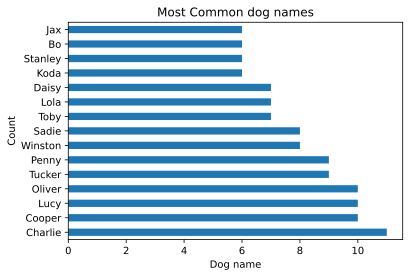

In [77]:
# Histogram to visualize dog breeeds
twitter_archive_master_new=twitter_archive_master[twitter_archive_master['name']!='None']

twitter_archive_master_new.name.value_counts().sort_values(ascending=False)[:15].plot(kind='barh',title='Most Common dog names')
plt.xlabel('Dog name')
plt.ylabel('Count');


*The most common dog name is* **`Charlie`**

**What is the distribution of dog genders**

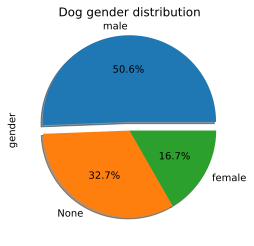

In [78]:
twitter_archive_master.gender.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=(0.1,0,0))
plt.title('Dog gender distribution');

 **`Male`** *dogs are the most popular genders contributing to 70% of known genders*

**Which is the most popular predicted dog breed in terms of retweets and favorites count**

In [79]:
twitter_archive_master.groupby('prediction_breed')
# Retweet count
highest_retweet_count = (twitter_archive_master.groupby(['prediction_breed']).max()['retweet_count'])
highest_retweet_count.sort_values(ascending = False).head(10)

prediction_breed
Labrador retriever    79515
Chihuahua             56625
Eskimo dog            52360
Lakeland terrier      48265
English springer      45849
Standard poodle       42228
Cocker spaniel        37911
None                  33421
French bulldog        32883
Whippet               31989
Name: retweet_count, dtype: int64

In [80]:
# Favorites count
highest_favorites_count = (twitter_archive_master.groupby(['prediction_breed']).max()['favorite_count'])
highest_favorites_count.sort_values(ascending = False).head(10)

prediction_breed
Lakeland terrier            132810
Labrador retriever          131075
English springer            107956
French bulldog              106827
Golden retriever             85011
Malamute                     75193
Eskimo dog                   75163
Chesapeake bay retriever     71144
Pembroke                     69871
Italian greyhound            68152
Name: favorite_count, dtype: int64

The most retweeted dog breed is **`Chihuahua`** followed by **`English springer`** .
It's interesting the same is not for favorites count with **`English springer`** leading in the favorites and **`Chihuahua`** nowhere near the top ten

**Which is the most and least retweeted photo**

In [81]:
!pip install pillow
from PIL import Image
import requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
#Most reweeted photo
twitter_archive_master[twitter_archive_master.retweet_count==twitter_archive_master.retweet_count.max()]


tweet_id                  timestamp  \
810  744234799360020481  2016-06-18 18:26:18+00:00   

                                                  text  rating_numerator  \
810  Here's a doggo realizing you can stand in a po...                13   

     rating_denominator  name                 created_at  retweet_count  \
810                  10  None  2016-06-18 18:26:18+00:00          79515   

     favorite_count  favorited  retweeted  \
810          131075      False      False   

                                               jpg_url  img_num gender  \
810  https://pbs.twimg.com/ext_tw_video_thumb/74423...        1   None   

    life_stage    prediction_breed  confidence  
810       None  Labrador retriever    0.825333

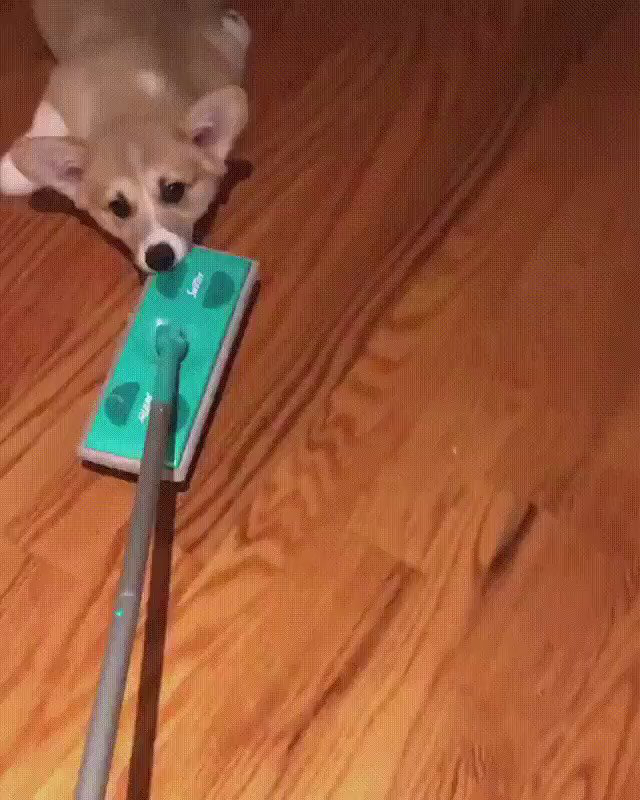

In [83]:

most_retweeted=Image.open(requests.get('https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',stream=True).raw)
most_retweeted

In [84]:
#Least reweeted photo
twitter_archive_master[twitter_archive_master.retweet_count==twitter_archive_master.retweet_count.min()]

tweet_id                  timestamp  \
1991  666102155909144576  2015-11-16 03:55:04+00:00   

                                                   text  rating_numerator  \
1991  Oh my. Here you are seeing an Adobe Setter giv...                11   

      rating_denominator  name                 created_at  retweet_count  \
1991                  10  None  2015-11-16 03:55:04+00:00             16   

      favorite_count  favorited  retweeted  \
1991              81      False      False   

                                              jpg_url  img_num gender  \
1991  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg        1   None   

     life_stage prediction_breed  confidence  
1991       None   English setter    0.298617

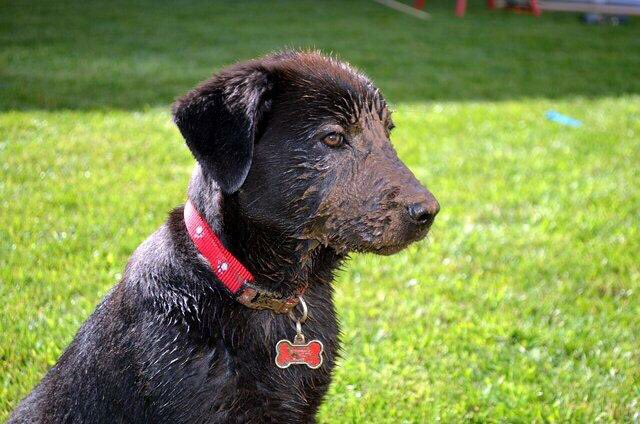

In [85]:
least_retweeted=Image.open(requests.get('https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg',stream=True).raw)
least_retweeted

**Which is the most and least liked photo**

In [86]:
#Most liked
twitter_archive_master[twitter_archive_master.favorite_count==twitter_archive_master.favorite_count.max()]

tweet_id                  timestamp  \
325  822872901745569793  2017-01-21 18:26:02+00:00   

                                                  text  rating_numerator  \
325  Here's a super supportive puppo participating ...                13   

     rating_denominator  name                 created_at  retweet_count  \
325                  10  None  2017-01-21 18:26:02+00:00          48265   

     favorite_count  favorited  retweeted  \
325          132810      False      False   

                                             jpg_url  img_num gender  \
325  https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg        1   None   

    life_stage  prediction_breed  confidence  
325       None  Lakeland terrier    0.196015

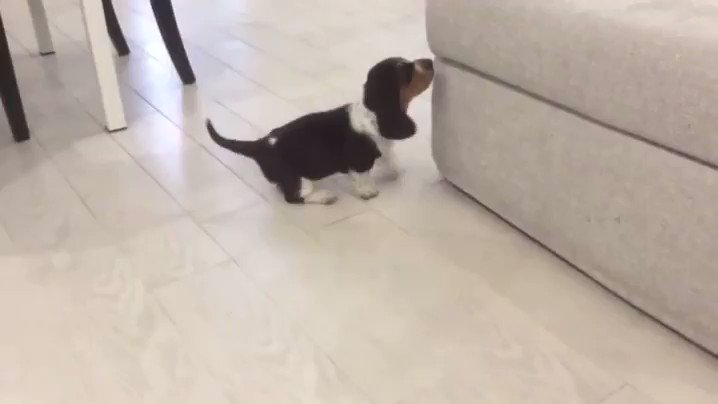

In [87]:
most_liked=Image.open(requests.get('https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg',stream=True).raw)
most_liked

In [88]:
#Least liked
twitter_archive_master[twitter_archive_master.favorite_count==twitter_archive_master.favorite_count.min()]

tweet_id                  timestamp  \
32    885311592912609280  2017-07-13 01:35:06+00:00   
67    877611172832227328  2017-06-21 19:36:23+00:00   
81    873697596434513921  2017-06-11 00:25:14+00:00   
108   867072653475098625  2017-05-23 17:40:04+00:00   
128   861769973181624320  2017-05-09 02:29:07+00:00   
132   860924035999428608  2017-05-06 18:27:40+00:00   
169   851953902622658560  2017-04-12 00:23:33+00:00   
170   851861385021730816  2017-04-11 18:15:55+00:00   
185   847971574464610304  2017-04-01 00:39:12+00:00   
208   842892208864923648  2017-03-18 00:15:37+00:00   
214   841833993020538882  2017-03-15 02:10:39+00:00   
225   839290600511926273  2017-03-08 01:44:07+00:00   
228   838916489579200512  2017-03-07 00:57:32+00:00   
237   837012587749474308  2017-03-01 18:52:06+00:00   
262   832769181346996225  2017-02-18 01:50:19+00:00   
268   832215726631055365  2017-02-16 13:11:05+00:00   
269   832040443403784192  2017-02-16 01:34:34+00:00   
282   829878982036299777  2017-02-10 02:25:42+00:00   
314   824796380199809024  2017-01-27 01:49:15+00:00   
323   823269594223824897  2017-01-22 20:42:21+00:00   
327   822647212903690241  2017-01-21 03:29:14+00:00   
331   821813639212650496  2017-01-18 20:16:54+00:00   
340   820446719150292993  2017-01-15 01:45:15+00:00   
349   819015337530290176  2017-01-11 02:57:27+00:00   
350   819015331746349057  2017-01-11 02:57:26+00:00   
353   818588835076603904  2017-01-09 22:42:41+00:00   
361   817181837579653120  2017-01-06 01:31:47+00:00   
365   816829038950027264  2017-01-05 02:09:53+00:00   
371   816014286006976512  2017-01-02 20:12:21+00:00   
380   813944609378369540  2016-12-28 03:08:11+00:00   
411   809808892968534016  2016-12-16 17:14:20+00:00   
418   808134635716833280  2016-12-12 02:21:26+00:00   
422   807059379405148160  2016-12-09 03:08:45+00:00   
425   806242860592926720  2016-12-06 21:04:11+00:00   
427   805958939288408065  2016-12-06 02:15:59+00:00   
434   804413760345620481  2016-12-01 19:56:00+00:00   
437   803692223237865472  2016-11-29 20:08:52+00:00   
442   802624713319034886  2016-11-26 21:26:58+00:00   
446   802247111496568832  2016-11-25 20:26:31+00:00   
455   800443802682937345  2016-11-20 21:00:48+00:00   
458   799774291445383169  2016-11-19 00:40:24+00:00   
465   798697898615730177  2016-11-16 01:23:12+00:00   
466   798694562394996736  2016-11-16 01:09:57+00:00   
467   798673117451325440  2016-11-15 23:44:44+00:00   
468   798665375516884993  2016-11-15 23:13:58+00:00   
469   798644042770751489  2016-11-15 21:49:12+00:00   
470   798628517273620480  2016-11-15 20:47:30+00:00   
471   798340744599797760  2016-11-15 01:44:00+00:00   
480   796177847564038144  2016-11-09 02:29:25+00:00   
486   794983741416415232  2016-11-05 19:24:28+00:00   
488   794355576146903043  2016-11-04 01:48:22+00:00   
492   793614319594401792  2016-11-02 00:42:53+00:00   
513   791026214425268224  2016-10-25 21:18:40+00:00   
515   790723298204217344  2016-10-25 01:14:59+00:00   
527   788070120937619456  2016-10-17 17:32:13+00:00   
539   786036967502913536  2016-10-12 02:53:11+00:00   
553   783347506784731136  2016-10-04 16:46:14+00:00   
558   782021823840026624  2016-10-01 00:58:26+00:00   
568   780496263422808064  2016-09-26 19:56:24+00:00   
569   780476555013349377  2016-09-26 18:38:05+00:00   
579   778396591732486144  2016-09-21 00:53:04+00:00   
585   777641927919427584  2016-09-18 22:54:18+00:00   
588   776819012571455488  2016-09-16 16:24:19+00:00   
594   775898661951791106  2016-09-14 03:27:11+00:00   
611   772615324260794368  2016-09-05 02:00:22+00:00   
620   771171053431250945  2016-09-01 02:21:21+00:00   
629   770093767776997377  2016-08-29 03:00:36+00:00   
648   766078092750233600  2016-08-18 01:03:45+00:00   
665   761750502866649088  2016-08-06 02:27:27+00:00   
669   761371037149827077  2016-08-05 01:19:35+00:00   
683   759566828574212096  2016-07-31 01:50:18+00:00   
687   759159934323924993  2016-07-29 22:53:27+00:00   
6

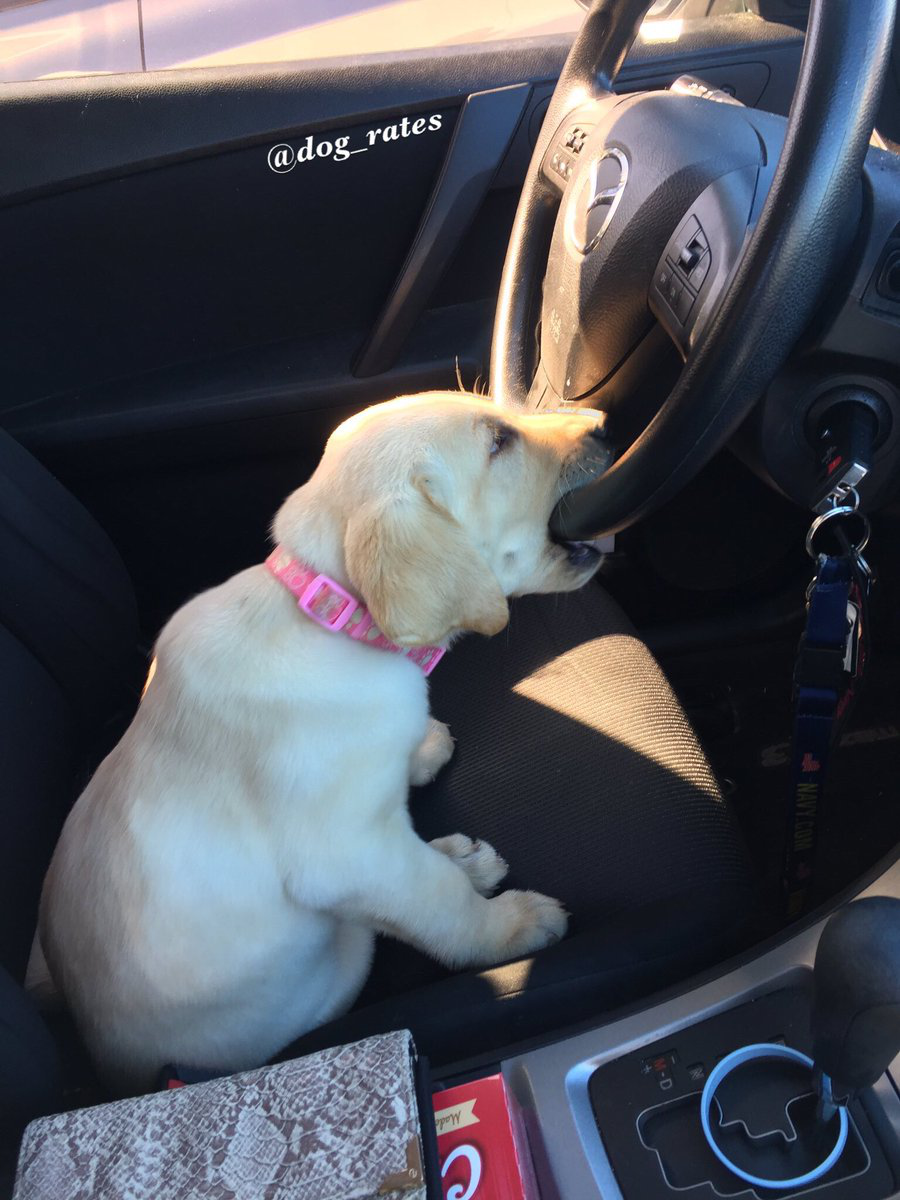

In [89]:
least_liked=Image.open(requests.get('https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg',stream=True).raw)
least_liked

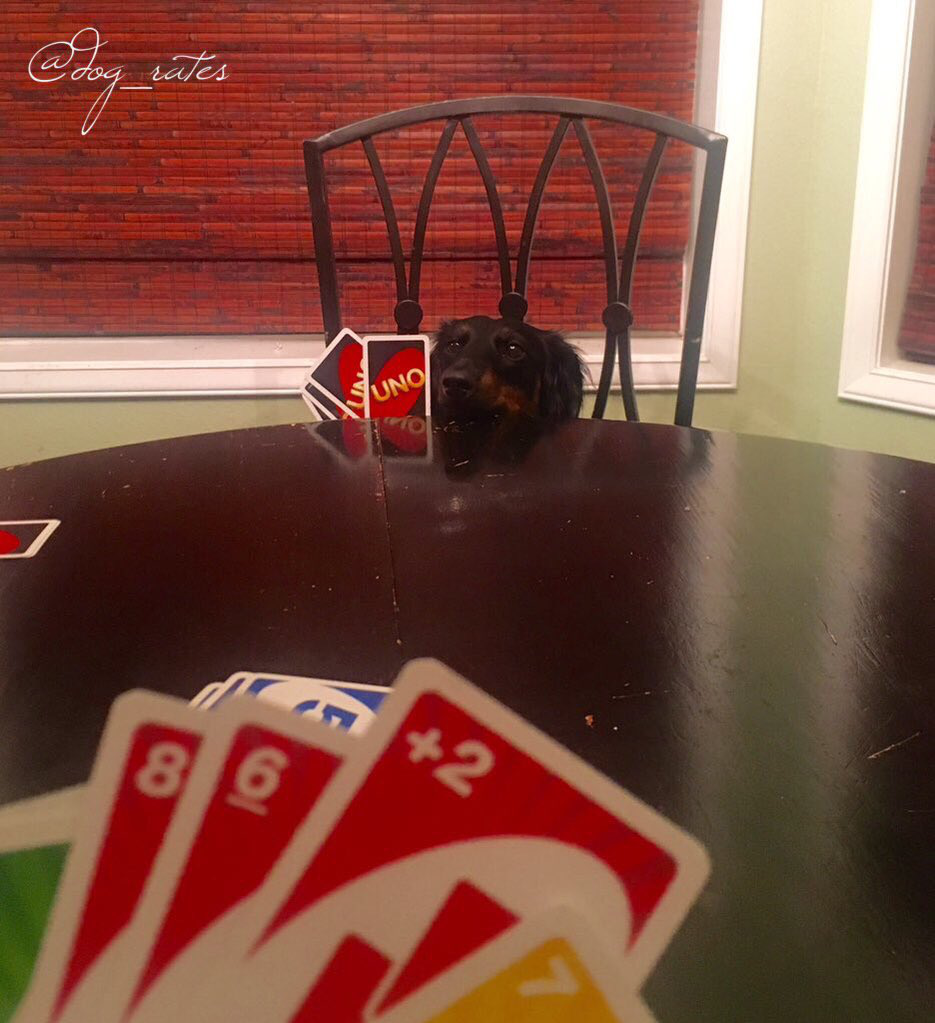

In [90]:
#Least liked photo
least_liked_2=Image.open(requests.get('https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg',stream=True).raw)
least_liked_2